# Práctica 9. Aprendizaje no supervisado

In [3]:
%matplotlib inline

#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler

#importing the Iris dataset with pandas
dataset = pd.read_csv('../dataset/Iris.csv')

scaler = StandardScaler()

#normalización de datos
#dataset.loc[:] = scaler.fit_transform(dataset.loc[:])

x = dataset.iloc[:, [1, 2, 3, 4]].values

In [4]:
# Se elimina el atributo Id
dataset.drop(columns=["Id"], inplace=True)

dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Visualización del dataset

## Histograma

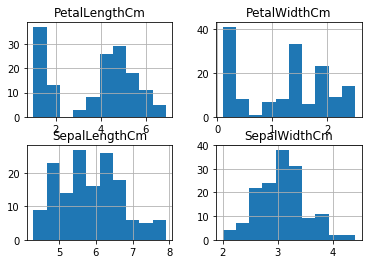

In [5]:
dataset.hist()
plt.show()

## Gráficas de densidad

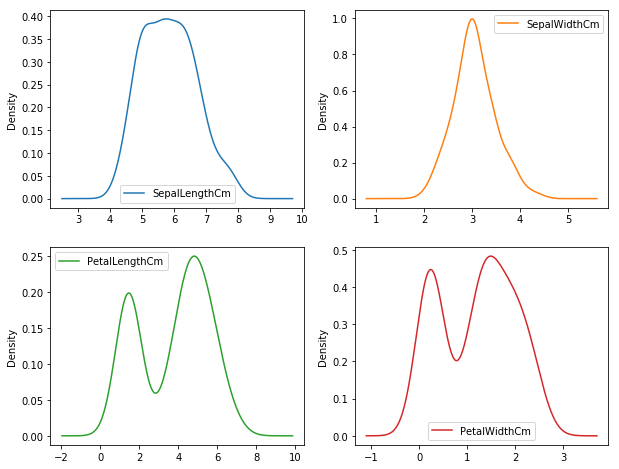

In [6]:
_ = dataset.plot(kind='density', subplots=True, layout=(2,2), sharex=False, figsize=(10,8))

## Gráfica de cajas

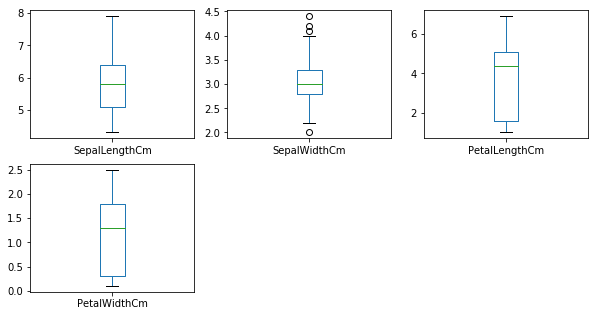

In [7]:
_ = dataset.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))
plt.show()

## Gráfica de Correlación

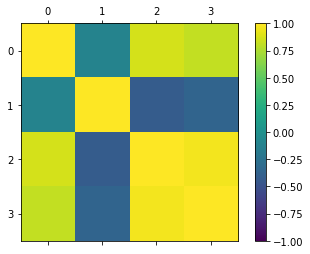

In [8]:
import numpy as np
import matplotlib.pyplot as plt

correlations = dataset.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,4,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.show()

## Gráfica de dispersión

### Pandas

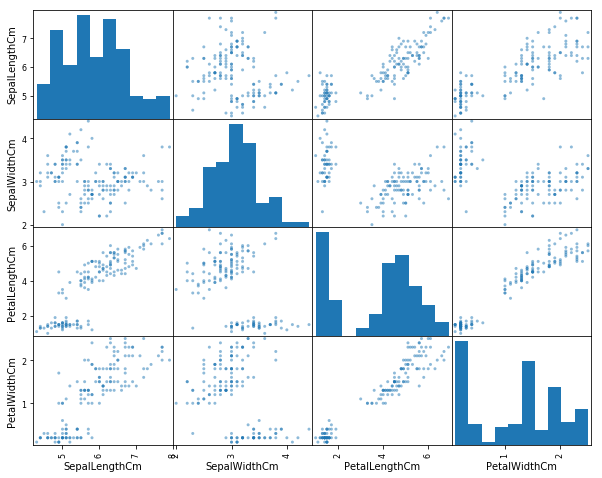

In [9]:
#from pandas.plotting import scatter_matrix
pd.plotting.scatter_matrix(dataset, figsize=(10,8))
plt.show()

### Seaborn

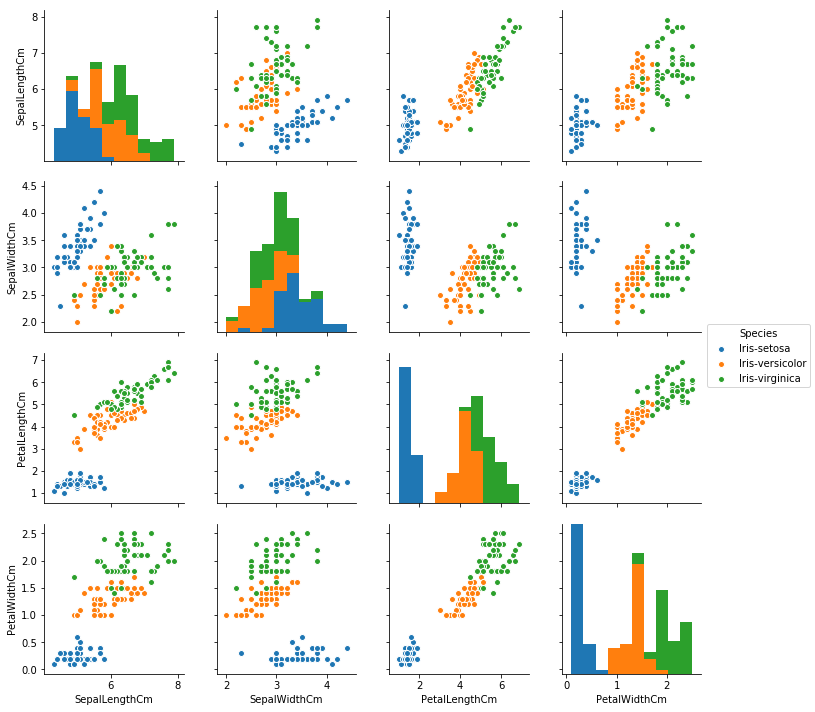

In [10]:
import seaborn as sns
sns.pairplot(dataset, hue="Species")
plt.show()

# Modelos de reducción de dimensionalidad 

## Visualización 3D del dataset iris a través del modelo PCA

<IPython.core.display.Javascript object>


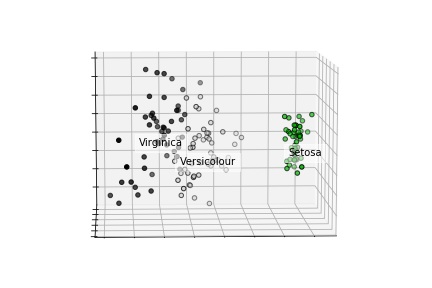

In [20]:
%matplotlib notebook

import numpy as np
#import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
x = dataset.drop(columns=["Species"])
y = dataset["Species"]

plt.figure()

lbl= LabelEncoder().fit(y)
y = lbl.transform(y)

fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(x)
X = pca.transform(x)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

<IPython.core.display.Javascript object>


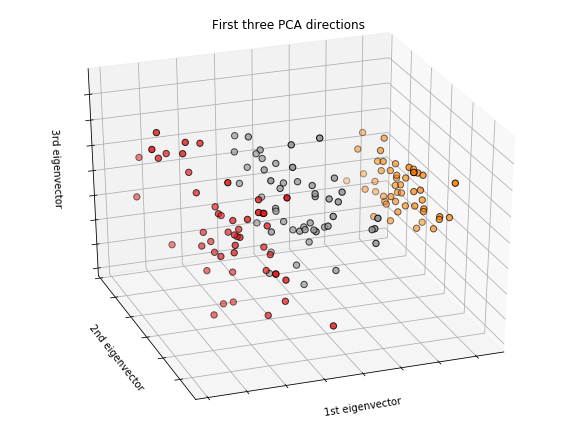

In [14]:
%matplotlib notebook

def view3D(X, y, model = decomposition.PCA):
    fig = plt.figure(1,figsize=(8, 6))
    ax = Axes3D(fig, elev=-150, azim=110)
    X_reduced = model(n_components=3).fit_transform(X)
    ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
             cmap=plt.cm.Set1, edgecolor='k', s=40)
    ax.set_title("First three PCA directions")
    ax.set_xlabel("1st eigenvector")
    ax.w_xaxis.set_ticklabels([])
    ax.set_ylabel("2nd eigenvector")
    ax.w_yaxis.set_ticklabels([])
    ax.set_zlabel("3rd eigenvector")
    ax.w_zaxis.set_ticklabels([])
    plt.show()
    
view3D(x,y)

# Singular Value Decomposition

<IPython.core.display.Javascript object>


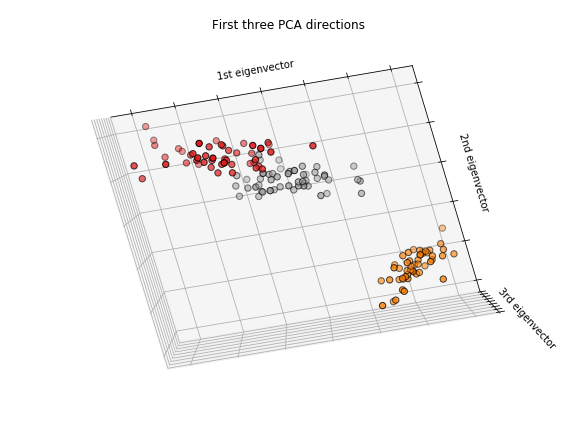

In [21]:
%matplotlib notebook

view3D(x,y, decomposition.TruncatedSVD)

# t-SNE

<IPython.core.display.Javascript object>


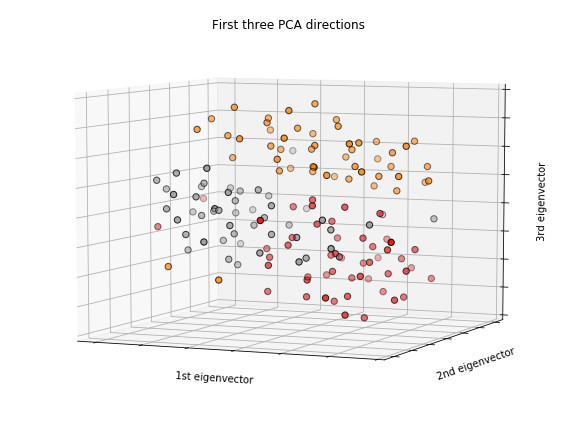

C:\Users\R\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:371: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


In [22]:
%matplotlib notebook
from sklearn.manifold import TSNE
view3D(x,y,TSNE)

## Ejercicio

A través del método elbow determinar el número de cluster óptimos de los conjuntos de datos: Dataset1 y Dataset2. Graficar los resultados en 3D y 2D empleando las técnicas de reducción de dimensionalidad.

Basarse en el código de ejemplo que se muestra a continuación

In [27]:
from sklearn.cluster import KMeans
%matplotlib notebook

Mx = dataset.drop(columns=["Species"]).values
x = decomposition.TruncatedSVD(n_components=2).fit_transform(X) 





kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)



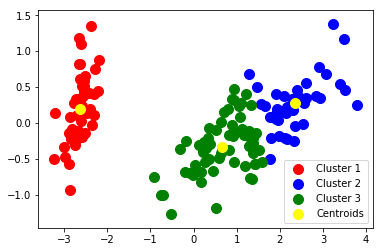

In [28]:
%matplotlib inline
plt.figure()

#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()